<div align="center">

# MLOps (S1-25_AIMLCZG523) ASSIGNMENT - 1

## Group - 126

</div>

| Name | ID | Contribution |
|------|----|----|
| DEVAPRASAD P | 2023AA05069 | 100% |
| DEVENDER KUMAR | 2024AA05065 | 100% |
| ROHAN TIRTHANKAR BEHERA | 2024AA05607 | 100% |
| PALAKOLANU PREETHI | 2024AA05608 | 100% |
| CHAVALI AMRUTHA VALLI | 2024AA05610 | 100% |

---

# Data Acquisition and Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## Load Data

In [2]:
# Define column names based on UCI documentation
column_names = [
    'age',           # Age in years
    'sex',           # Sex (1 = male; 0 = female)
    'cp',            # Chest pain type (1-4)
    'trestbps',      # Resting blood pressure (mm Hg)
    'chol',          # Serum cholesterol (mg/dl)
    'fbs',           # Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    'restecg',       # Resting ECG results (0-2)
    'thalach',       # Maximum heart rate achieved
    'exang',         # Exercise induced angina (1 = yes; 0 = no)
    'oldpeak',       # ST depression induced by exercise
    'slope',         # Slope of peak exercise ST segment (1-3)
    'ca',            # Number of major vessels colored by fluoroscopy (0-3)
    'thal',          # Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
    'target'         # Diagnosis (0 = no disease, 1-4 = disease)
]

# Load the Cleveland dataset (most commonly used)
data_path = Path('../heart+disease/processed.cleveland.data')
df = pd.read_csv(data_path, names=column_names, na_values='?')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head(10)

Dataset shape: (303, 14)

First few rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


## Initial Data Inspection

In [3]:
# Dataset information
print("Dataset Info:")
print("=" * 50)
df.info()
print("\n" + "=" * 50)
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Basic Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [4]:
# Check for missing values
print("Missing Values:")
print("=" * 50)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values:
      Missing Count  Percentage
ca                4    1.320132
thal              2    0.660066


## Data Cleaning

In [5]:
# Create a copy for cleaning
df_clean = df.copy()

# Handle missing values
print("Handling missing values...")
print(f"Rows before cleaning: {len(df_clean)}")

# For ca and thal, we'll use the mode (most common value) for imputation
if df_clean['ca'].isnull().sum() > 0:
    df_clean['ca'].fillna(df_clean['ca'].mode()[0], inplace=True)
    
if df_clean['thal'].isnull().sum() > 0:
    df_clean['thal'].fillna(df_clean['thal'].mode()[0], inplace=True)

print(f"Rows after cleaning: {len(df_clean)}")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

Handling missing values...
Rows before cleaning: 303
Rows after cleaning: 303
Remaining missing values: 0


In [6]:
# Convert target to binary (0 = no disease, 1 = disease present)
# Original: 0 = no disease, 1-4 = different stages of disease
# The target variable was binarized to frame the problem as a binary classification task,
# aligning with the objective of predicting disease presence.
df_clean['target'] = (df_clean['target'] > 0).astype(int)

print("Target variable distribution:")
print(df_clean['target'].value_counts())
print(f"\nClass balance: {df_clean['target'].value_counts(normalize=True) * 100}")

Target variable distribution:
target
0    164
1    139
Name: count, dtype: int64

Class balance: target
0    54.125413
1    45.874587
Name: proportion, dtype: float64


## Exploratory Data Analysis

### Target Variable Distribution

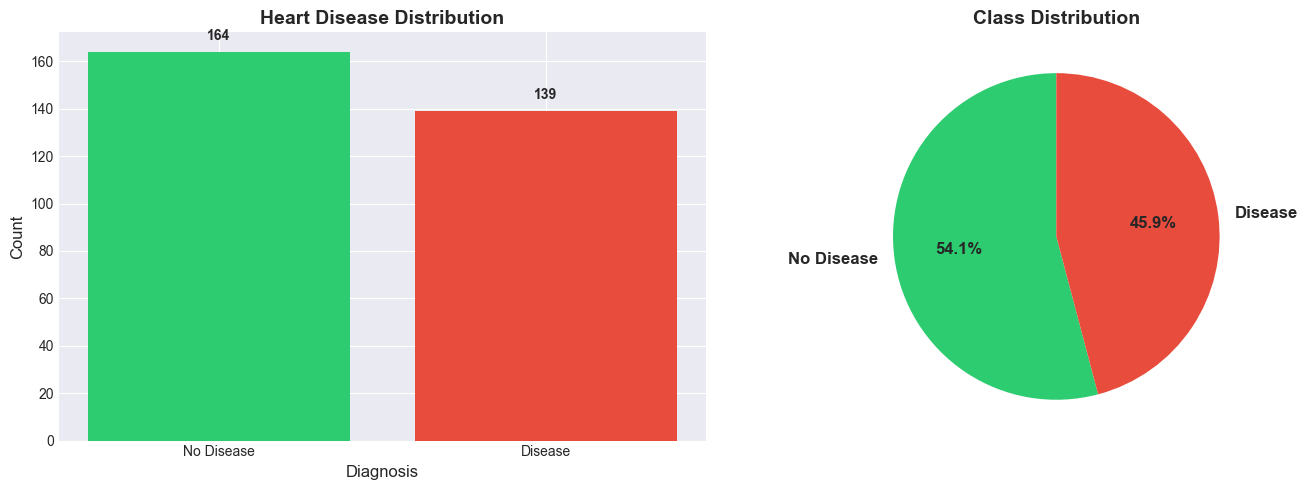

In [7]:
# Plot target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
target_counts = df_clean['target'].value_counts()
axes[0].bar(['No Disease', 'Disease'], target_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Heart Disease Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xlabel('Diagnosis', fontsize=12)
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(target_counts.values, labels=['No Disease', 'Disease'], 
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### Distribution of Continuous Features

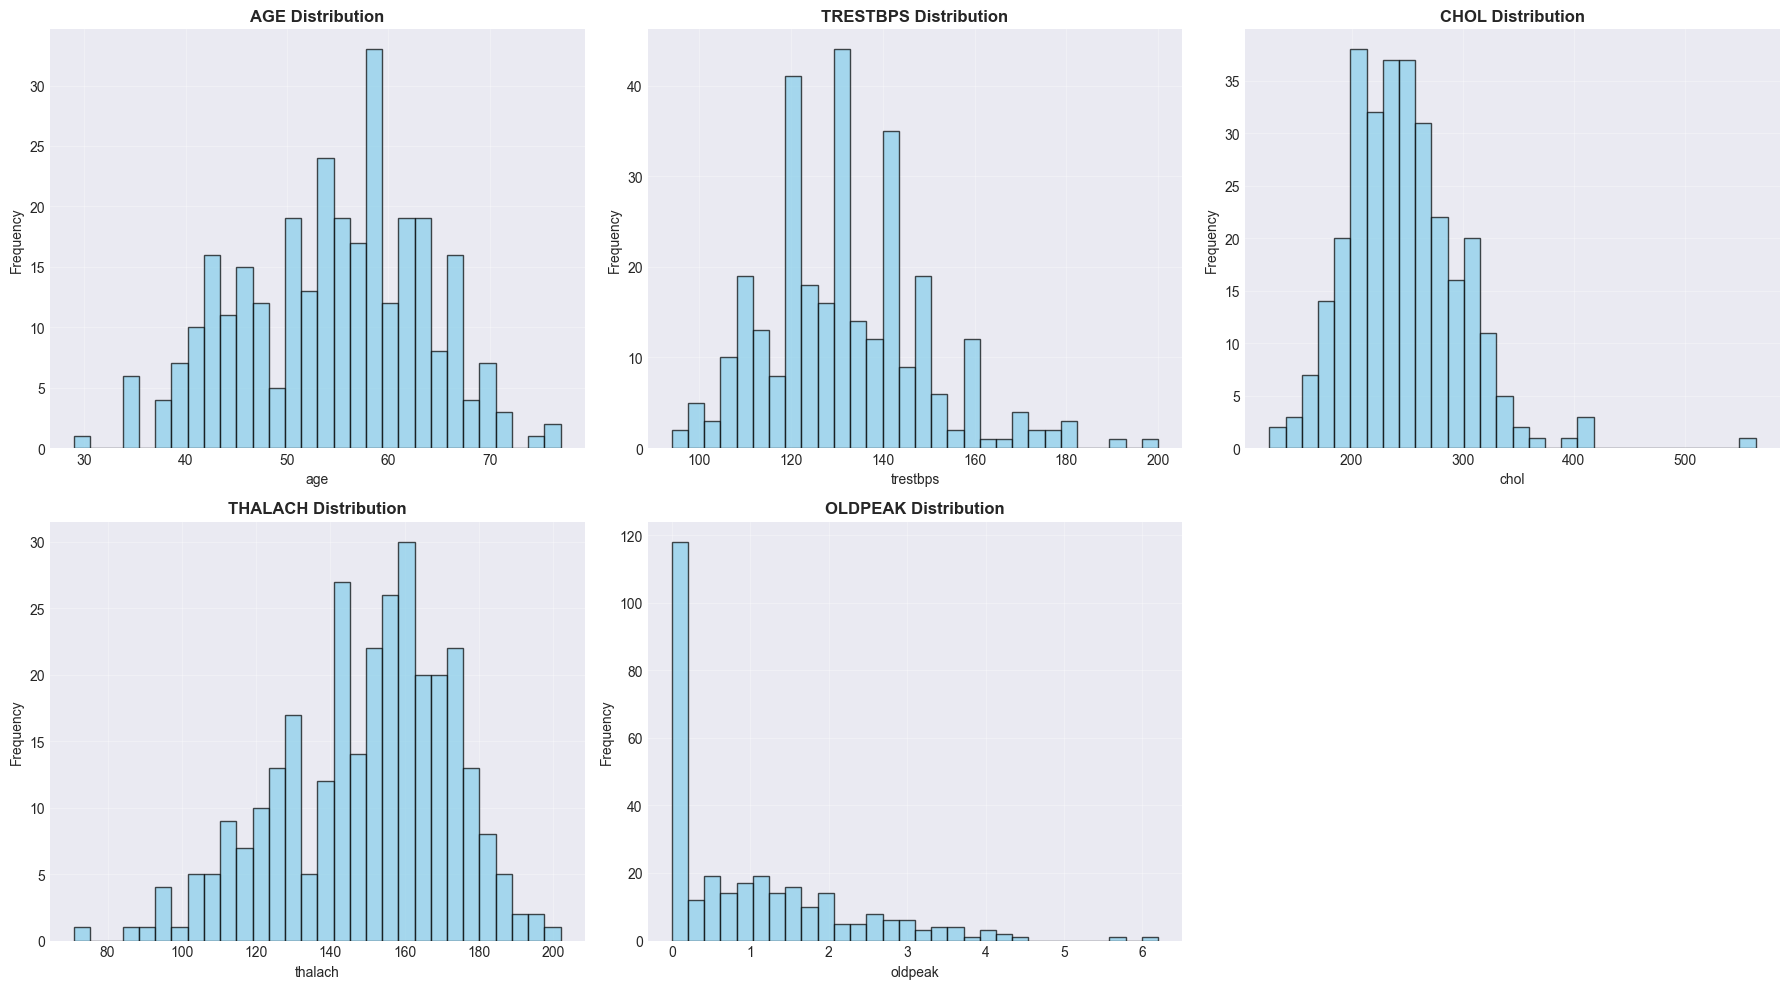

In [8]:
# Continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(continuous_features):
    # Histogram with KDE
    axes[idx].hist(df_clean[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'{feature.upper()} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig('../figures/continuous_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

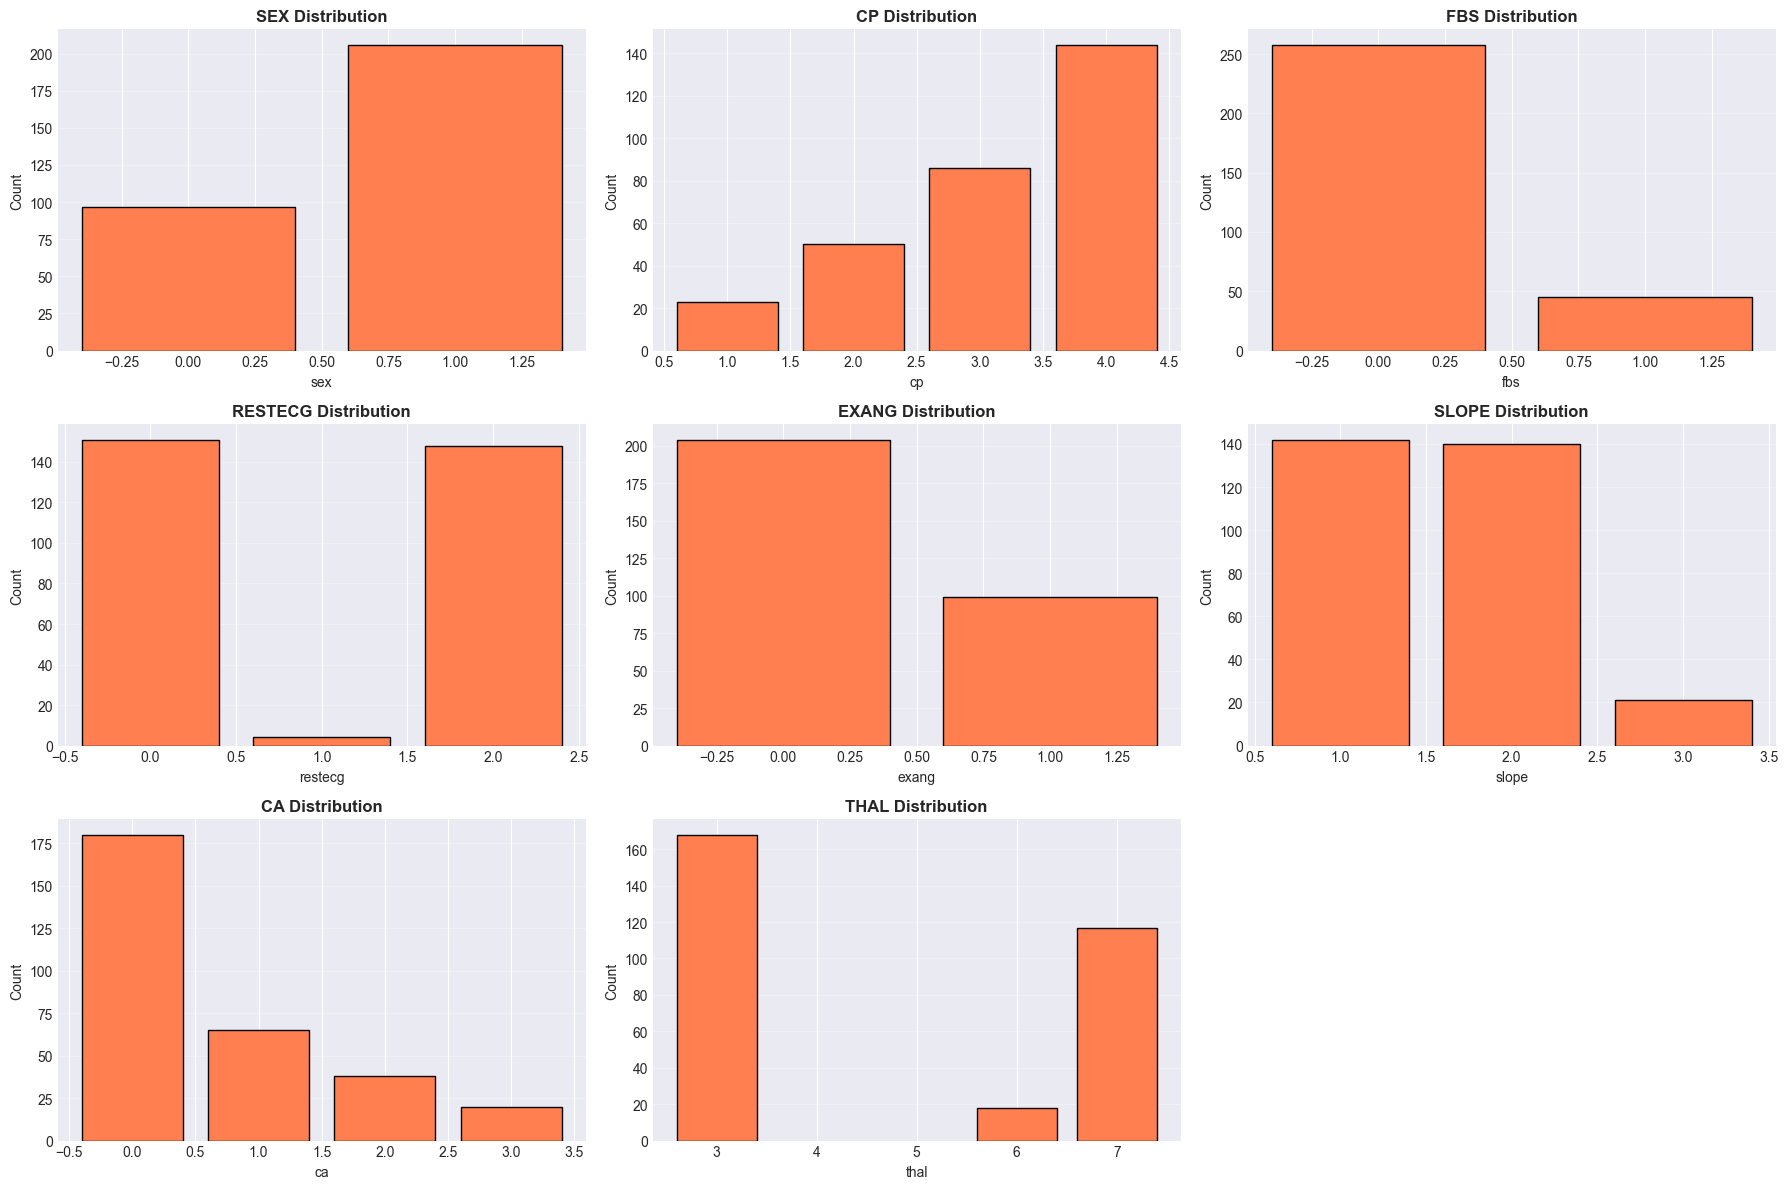

In [9]:
# Categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    feature_counts = df_clean[feature].value_counts().sort_index()
    axes[idx].bar(feature_counts.index, feature_counts.values, color='coral', edgecolor='black')
    axes[idx].set_title(f'{feature.upper()} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].grid(alpha=0.3, axis='y')

# Remove empty subplot
fig.delaxes(axes[8])

plt.tight_layout()
plt.savefig('../figures/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

### Correlation Analysis

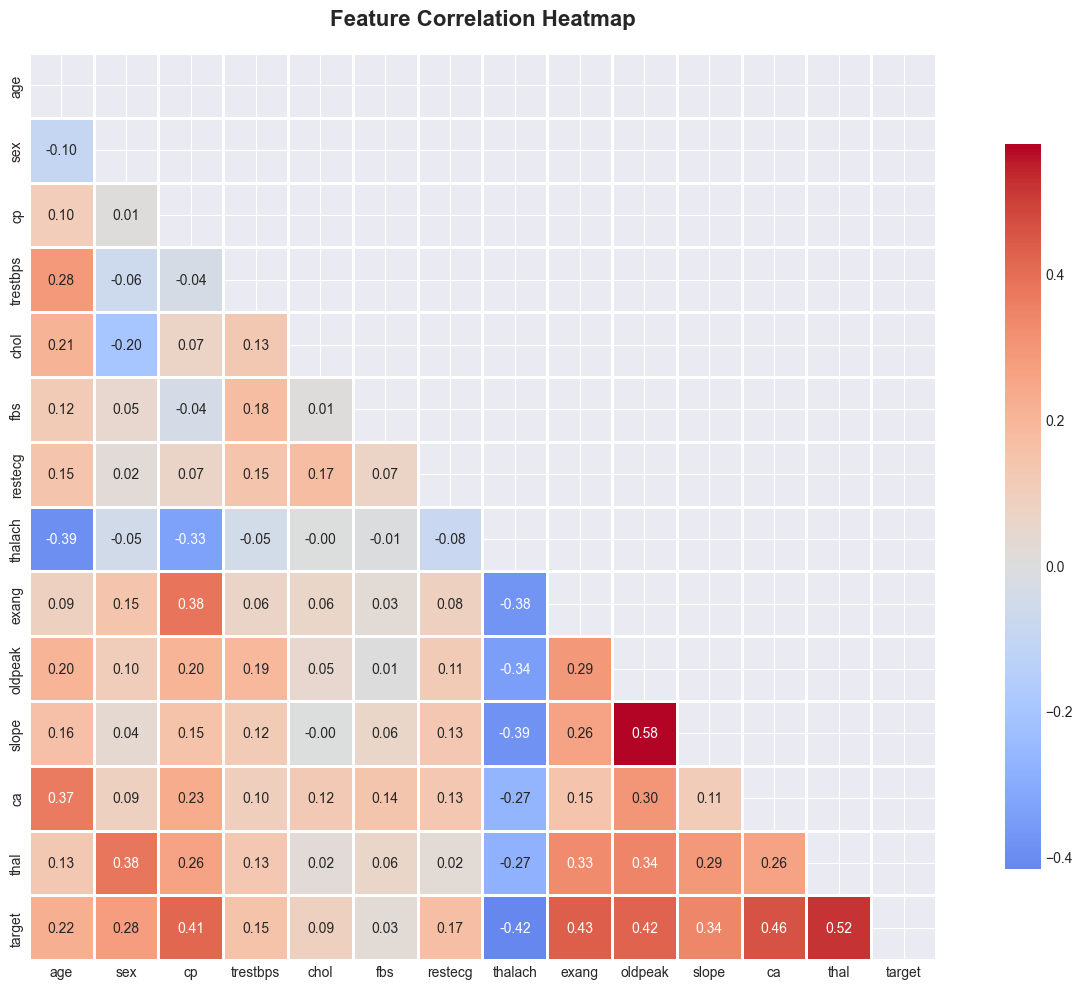


Top 10 Correlations with Target:
thal        0.522057
ca          0.460033
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64


In [10]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df_clean.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with target
print("\nTop 10 Correlations with Target:")
print("=" * 50)
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print(target_corr[1:])

### Feature Relationships with Target

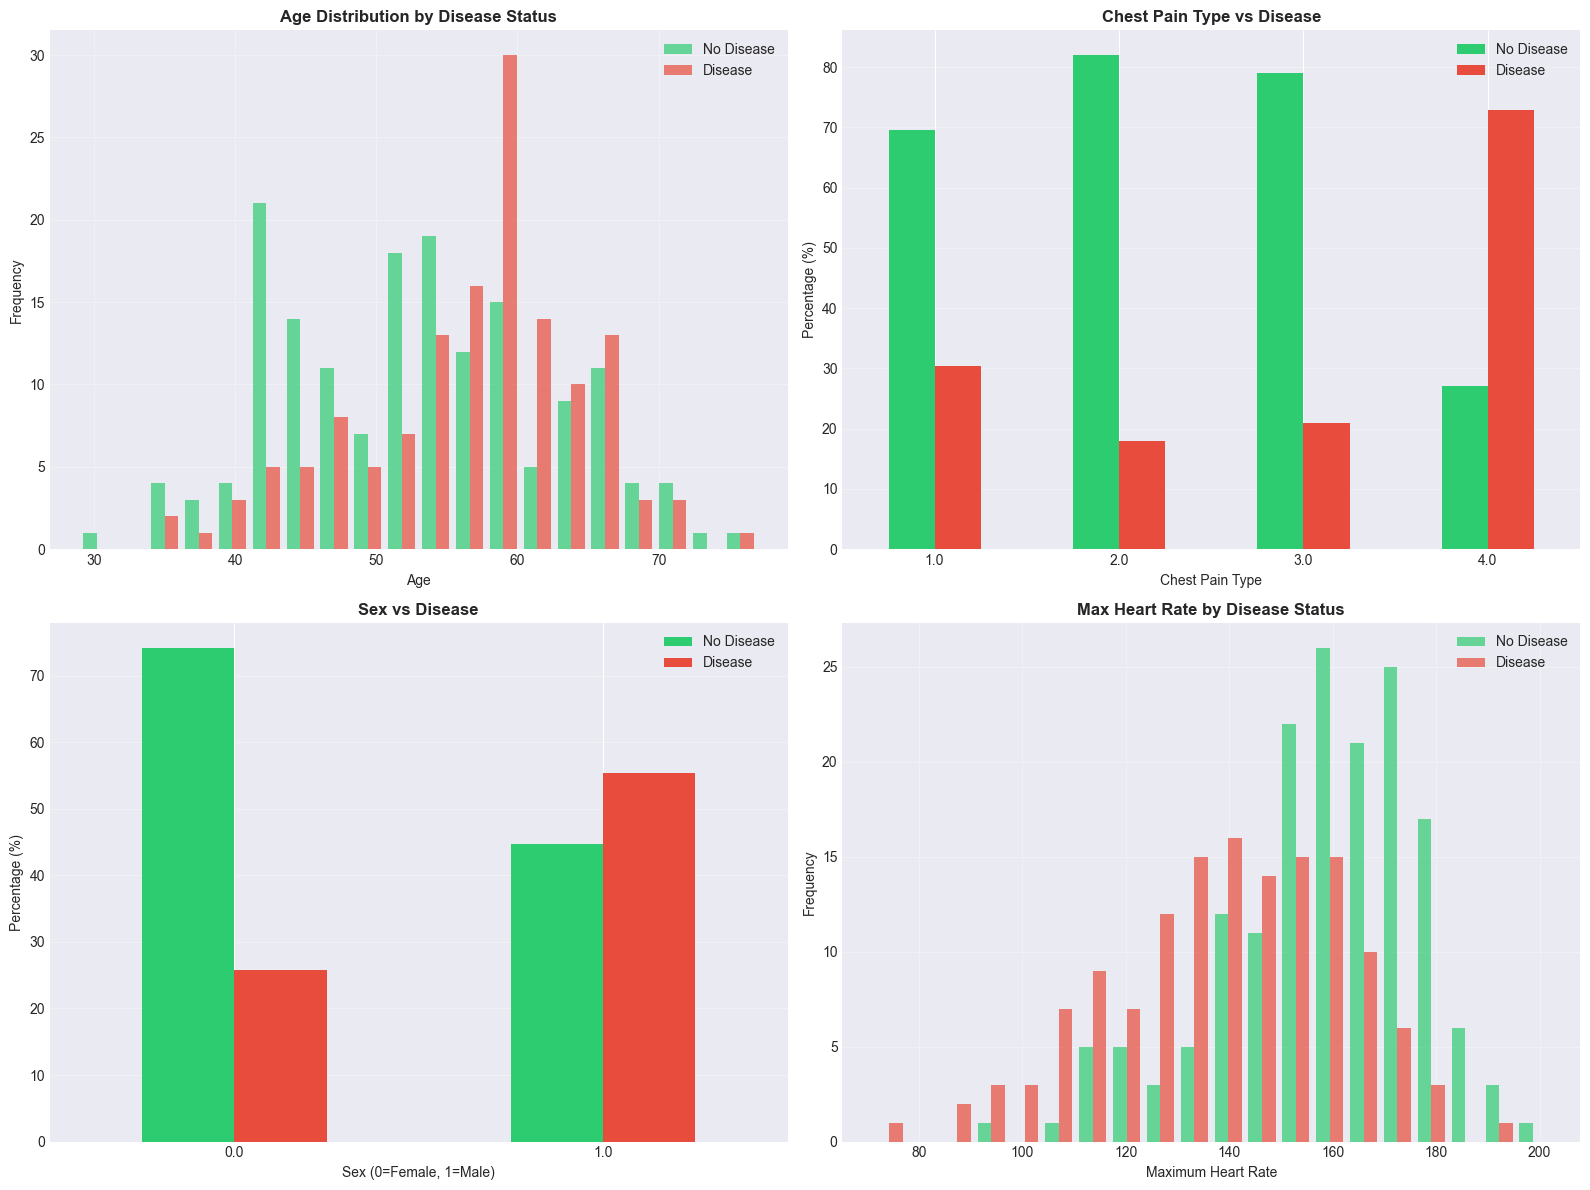

In [11]:
# Age vs Target
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age distribution by target
axes[0, 0].hist([df_clean[df_clean['target']==0]['age'], 
                 df_clean[df_clean['target']==1]['age']], 
                bins=20, label=['No Disease', 'Disease'], 
                color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 0].set_title('Age Distribution by Disease Status', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Chest pain type vs target
cp_target = pd.crosstab(df_clean['cp'], df_clean['target'], normalize='index') * 100
cp_target.plot(kind='bar', ax=axes[0, 1], color=['#2ecc71', '#e74c3c'])
axes[0, 1].set_title('Chest Pain Type vs Disease', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Chest Pain Type', fontsize=10)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=10)
axes[0, 1].legend(['No Disease', 'Disease'])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].grid(alpha=0.3, axis='y')

# Sex vs target
sex_target = pd.crosstab(df_clean['sex'], df_clean['target'], normalize='index') * 100
sex_target.plot(kind='bar', ax=axes[1, 0], color=['#2ecc71', '#e74c3c'])
axes[1, 0].set_title('Sex vs Disease', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sex (0=Female, 1=Male)', fontsize=10)
axes[1, 0].set_ylabel('Percentage (%)', fontsize=10)
axes[1, 0].legend(['No Disease', 'Disease'])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].grid(alpha=0.3, axis='y')

# Max heart rate by target
axes[1, 1].hist([df_clean[df_clean['target']==0]['thalach'], 
                 df_clean[df_clean['target']==1]['thalach']], 
                bins=20, label=['No Disease', 'Disease'], 
                color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 1].set_title('Max Heart Rate by Disease Status', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Maximum Heart Rate', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/feature_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

### Outlier Detection

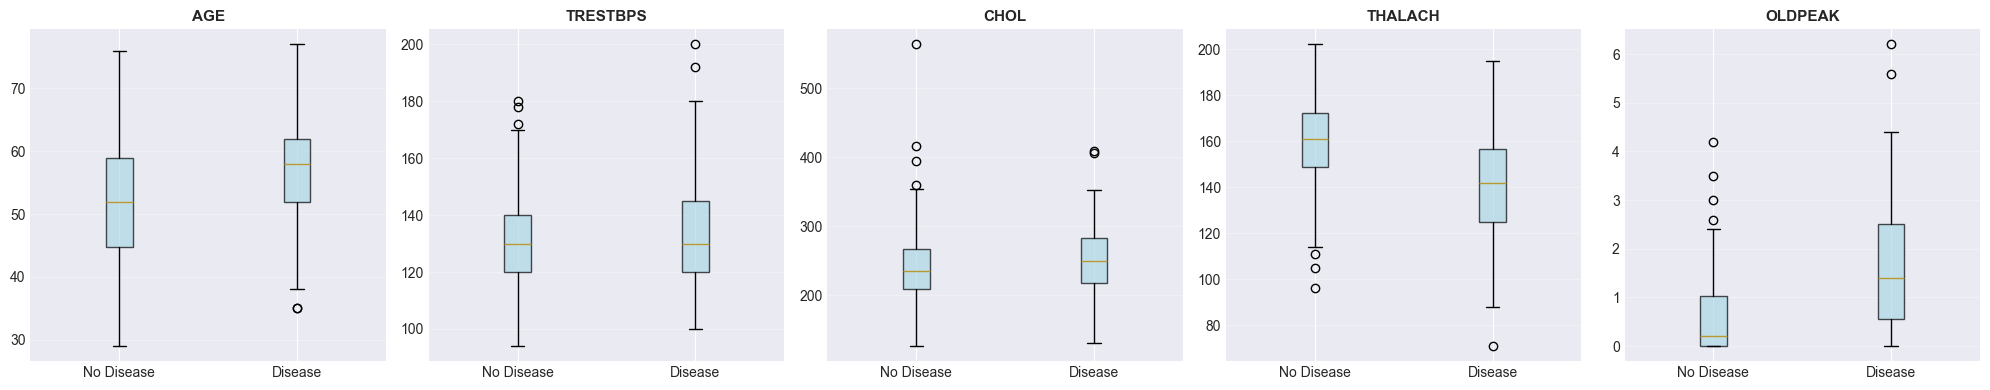

In [12]:
# Box plots for continuous features
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for idx, feature in enumerate(continuous_features):
    axes[idx].boxplot([df_clean[df_clean['target']==0][feature],
                       df_clean[df_clean['target']==1][feature]],
                      labels=['No Disease', 'Disease'],
                      patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7))
    axes[idx].set_title(feature.upper(), fontsize=11, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../figures/outlier_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Save Cleaned Data

In [13]:
# Save cleaned dataset
output_path = Path('../data/processed/heart_disease_clean.csv')
output_path.parent.mkdir(parents=True, exist_ok=True)
df_clean.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")
print(f"Shape: {df_clean.shape}")
print(f"\nFeatures: {list(df_clean.columns)}")

Cleaned dataset saved to: ../data/processed/heart_disease_clean.csv
Shape: (303, 14)

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


## Summary

The dataset contains 303 patient records with 14 features. After handling missing values in the ca and thal columns using mode imputation, the data is ready for modeling.

From the exploratory analysis:
- The target variable is fairly balanced between disease and no disease cases
- Chest pain type (cp) shows strong correlation with heart disease
- Maximum heart rate (thalach) is negatively correlated with disease
- Exercise induced angina (exang) is a strong indicator
- Males and older patients appear more prone to heart disease
- Some outliers exist in cholesterol and blood pressure values but seem medically reasonable